# Final Visualizations

In [4]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns

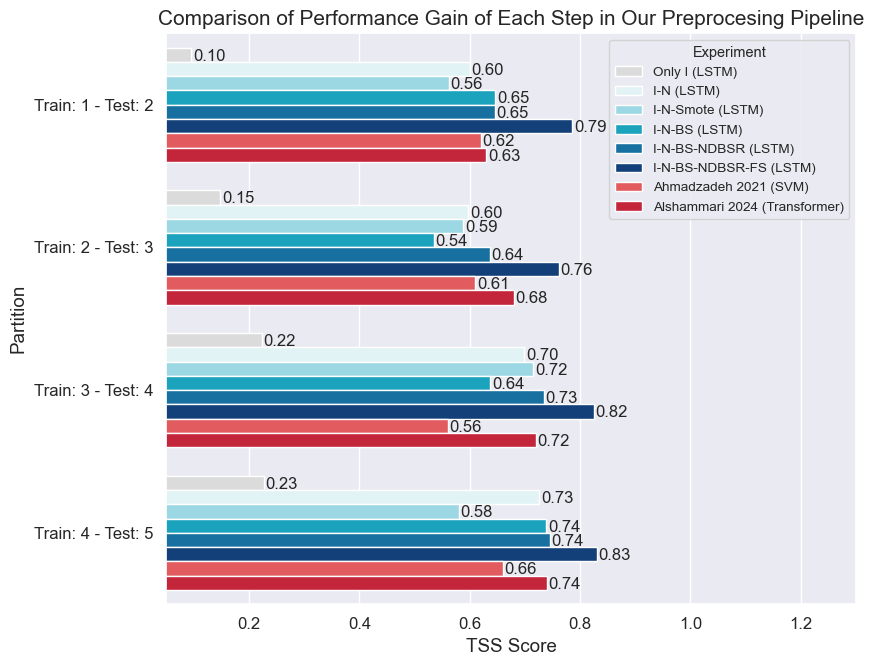

In [31]:
import pickle
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set seaborn style

# Define the data directory
data_dir = "/Users/samskanderi/MLP-ContrastiveLR-SWANSF/results/"

# Define the file names and corresponding experiment names
file_names = [
    "lstm_data.pkl",
    "lstm_normalized.pkl",
    "lstm_smote_normalized.pkl",
    "lstm_OUS_normalized.pkl",
    "lstm_CCBR_OUS_normalized.pkl",
    "lstm_FS_CCBR_OUS_normalized.pkl"
]

experiment_names = [
    "Only I (LSTM)",
    "I-N (LSTM)",
    "I-N-Smote (LSTM)",
    "I-N-BS (LSTM)",
    "I-N-BS-NDBSR (LSTM)",
    "I-N-BS-NDBSR-FS (LSTM)",
    "Ahmadzadeh 2021 (SVM)",
    "Alshammari 2024 (Transformer)"
]

# Load the data
all_data = []

for file_name in file_names:
    with open(os.path.join(data_dir, file_name), 'rb') as file:
        data = pickle.load(file)
        all_data.append(data)

# Extract TSS scores
tss_scores = []

for data in all_data:
    tss_scores.append([data[i][6] for i in range(4)])

# Add the additional results
tss_scores.append([0.62, 0.61, 0.56, 0.66])  # Ahmadzadeh 2021
tss_scores.append([0.63, 0.68, 0.72, 0.74])  # Alshammari 2024

# Prepare DataFrame for seaborn
tss_df = pd.DataFrame(tss_scores).T
tss_df.columns = experiment_names
tss_df['Partition'] = ["Train: 1 - Test: 2", "Train: 2 - Test: 3", "Train: 3 - Test: 4", "Train: 4 - Test: 5"]

# Decrease font size by 50%
font_scale = 1.5
sns.set_context("notebook", font_scale=font_scale)

# Define a color palette with shades of green and red
custom_palette = [
    "#dbdbdb", "#def5fa", "#90e0ef", "#00b4d8", "#0077b6", "#023e8a",  # Greens and other attractive colors
    "#f94449", "#de0a26"  # Reds for the two additional results
]

# Plot TSS Scores Bar Chart
tss_melted = tss_df.melt(id_vars='Partition', var_name='Experiment', value_name='TSS Score')
plt.figure(figsize=(9, 7))
barplot = sns.barplot(y='Partition', x='TSS Score', hue='Experiment', data=tss_melted, dodge=True, palette=custom_palette)
plt.title('Comparison of Performance Gain of Each Step in Our Preprocesing Pipeline', fontsize=10 * font_scale)
plt.ylabel('Partition', fontsize=9 * font_scale)
plt.xlabel('TSS Score', fontsize=9 * font_scale)
plt.xticks(fontsize=8 * font_scale)
plt.yticks(fontsize=8 * font_scale)
plt.legend(title='Experiment', fontsize=6.5 * font_scale, title_fontsize=7 * font_scale)

# Set the scale of x-axis
plt.xlim(0.05, 1.3)  # Adjust the values as needed

# Annotate each bar with its value
for p in barplot.patches:
    width = p.get_width()
    barplot.text(width + 0.003, p.get_y() + p.get_height() / 2 + 0.01, f'{width:.2f}', ha='left', va='center', fontsize=8 * font_scale)


plt.tight_layout()
plt.savefig('preprocessing.pdf')    
plt.show()

In [182]:
import numpy as np

# Initialize lists to store results
results = []

# Assuming your data structure has TSS at position 6, Recall at position 10, HSS at position 14, and GSS at position 18
for data, name in zip(all_data, experiment_names[:-2]):  # Exclude the last two experiments for now
    tss_mean = np.mean([data[i][6] for i in range(4)])
    tss_std = np.std([data[i][6] for i in range(4)])
    
    recall_mean = np.mean([data[i][10] for i in range(4)])
    recall_std = np.std([data[i][10] for i in range(4)])
    
    hss_mean = np.mean([data[i][7] for i in range(4)])
    hss_std = np.std([data[i][7] for i in range(4)])
    
    gss_mean = np.mean([data[i][9] for i in range(4)])
    gss_std = np.std([data[i][9] for i in range(4)])
    
    results.append((name, tss_mean, tss_std, recall_mean, recall_std, hss_mean, hss_std, gss_mean, gss_std))

# Add the additional results for Ahmadzadeh 2021 and Alshammari 2024 manually
results.append(("Ahmadzadeh 2021 (SVM)", np.mean([0.62, 0.61, 0.56, 0.66]), np.std([0.62, 0.61, 0.56, 0.66]), np.nan, np.nan, np.nan, np.nan, np.nan, np.nan))
results.append(("Alshammari 2024 (Transformer)", np.mean([0.63, 0.68, 0.72, 0.74]), np.std([0.63, 0.68, 0.72, 0.74]), np.nan, np.nan, np.nan, np.nan, np.nan, np.nan))

# Print the results
for result in results:
    print(f"{result[0]}: TSS Mean = {result[1]:.4f} ± {result[2]:.4f}, Recall Mean = {result[3]:.4f} ± {result[4]:.4f}, HSS Mean = {result[5]:.4f} ± {result[6]:.4f}, GSS Mean = {result[7]:.4f} ± {result[8]:.4f}")

Only I (LSTM): TSS Mean = 0.1732 ± 0.0550, Recall Mean = 0.4524 ± 0.2916, HSS Mean = 0.0512 ± 0.0219, GSS Mean = 199.4124 ± 44.2434
I-N (LSTM): TSS Mean = 0.6554 ± 0.0576, Recall Mean = 0.8560 ± 0.0537, HSS Mean = 0.1896 ± 0.0654, GSS Mean = 776.1568 ± 44.7123
I-N-Smote (LSTM): TSS Mean = 0.6114 ± 0.0607, Recall Mean = 0.7979 ± 0.0842, HSS Mean = 0.1827 ± 0.0376, GSS Mean = 729.6310 ± 98.5200
I-N-BS (LSTM): TSS Mean = 0.6393 ± 0.0720, Recall Mean = 0.8581 ± 0.1328, HSS Mean = 0.1818 ± 0.0903, GSS Mean = 756.9625 ± 71.4628
I-N-BS-NDBSR (LSTM): TSS Mean = 0.6904 ± 0.0496, Recall Mean = 0.8935 ± 0.0262, HSS Mean = 0.1919 ± 0.0546, GSS Mean = 819.5898 ± 60.9076
I-N-BS-NDBSR-FS (LSTM): TSS Mean = 0.8005 ± 0.0282, Recall Mean = 0.9451 ± 0.0073, HSS Mean = 0.1849 ± 0.0380, GSS Mean = 0.8005 ± 0.0282
Ahmadzadeh 2021 (SVM): TSS Mean = 0.6125 ± 0.0356, Recall Mean = nan ± nan, HSS Mean = nan ± nan, GSS Mean = nan ± nan
Alshammari 2024 (Transformer): TSS Mean = 0.6925 ± 0.0421, Recall Mean = nan 

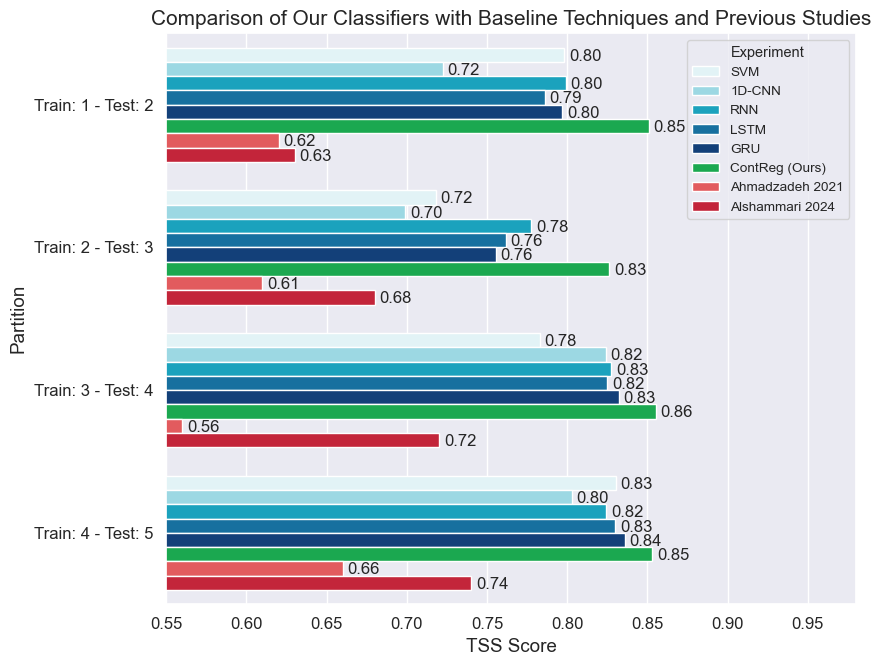

In [37]:
import pickle
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set seaborn style
sns.set_style("darkgrid")

# Define the data directory
data_dir = "/Users/samskanderi/MLP-ContrastiveLR-SWANSF/results/"

# Define the file names and corresponding experiment names
file_names = [
    "svm_FS_CCBR_OUS_normalized.pkl",
    "cnn_FS_CCBR_OUS_normalized.pkl",
    "rnn_FS_CCBR_OUS_normalized.pkl",
    "lstm_FS_CCBR_OUS_normalized.pkl",
    "gru_FS_CCBR_OUS_normalized.pkl",
    "contrastive_regression_result.pkl"
]

experiment_names = [
    "SVM",
    "1D-CNN",
    "RNN",
    "LSTM",
    "GRU",
    "ContReg (Ours)",
    "Ahmadzadeh 2021",
    "Alshammari 2024"
]

# Load the data
all_data = []

for file_name in file_names:
    with open(os.path.join(data_dir, file_name), 'rb') as file:
        data = pickle.load(file)
        all_data.append(data)

# Extract TSS scores
tss_scores = []

for data in all_data:
    tss_scores.append([data[i][6] for i in range(4)])

# Add the additional results
tss_scores.append([0.62, 0.61, 0.56, 0.66])  # Ahmadzadeh 2021
tss_scores.append([0.63, 0.68, 0.72, 0.74])  # Alshammari 2024

# Prepare DataFrame for seaborn
tss_df = pd.DataFrame(tss_scores).T
tss_df.columns = experiment_names
tss_df['Partition'] = ["Train: 1 - Test: 2", "Train: 2 - Test: 3", "Train: 3 - Test: 4", "Train: 4 - Test: 5"]

# Decrease font size by 50%
font_scale = 1.5
sns.set_context("notebook", font_scale=font_scale)

# Define a color palette with shades of green and red
custom_palette = [
    "#def5fa", "#90e0ef", "#00b4d8", "#0077b6", "#023e8a", "#03c04a",  # Greens and other attractive colors
    "#f94449", "#de0a26"  # Reds for the two additional results
]

# Plot TSS Scores Bar Chart
tss_melted = tss_df.melt(id_vars='Partition', var_name='Experiment', value_name='TSS Score')
plt.figure(figsize=(9, 7))
barplot = sns.barplot(y='Partition', x='TSS Score', hue='Experiment', data=tss_melted, dodge=True, palette=custom_palette)
plt.title('Comparison of Our Classifiers with Baseline Techniques and Previous Studies', fontsize=10 * font_scale)
plt.ylabel('Partition', fontsize=9 * font_scale)
plt.xlabel('TSS Score', fontsize=9 * font_scale)
plt.xticks(fontsize=8 * font_scale)
plt.yticks(fontsize=8 * font_scale)
plt.legend(title='Experiment', fontsize=6.5 * font_scale, title_fontsize=7 * font_scale)

# Set the scale of x-axis
plt.xlim(0.55, .98)  # Adjust the values as needed

# Annotate each bar with its value
for p in barplot.patches:
    width = p.get_width()
    barplot.text(width + 0.003, p.get_y() + p.get_height() / 2 + 0.01, f'{width:.2f}', ha='left', va='center', fontsize=8 * font_scale)

plt.tight_layout()
plt.savefig('classifiers.pdf')    
plt.show()

In [184]:
import numpy as np

# Initialize lists to store results
results = []

# Assuming your data structure has TSS at position 6, Recall at position 10, HSS at position 14, and GSS at position 18
for data, name in zip(all_data, experiment_names[:-2]):  # Exclude the last two experiments for now
    tss_mean = np.mean([data[i][6] for i in range(4)])
    tss_std = np.std([data[i][6] for i in range(4)])
    
    recall_mean = np.mean([data[i][10] for i in range(4)])
    recall_std = np.std([data[i][10] for i in range(4)])
    
    hss_mean = np.mean([data[i][7] for i in range(4)])
    hss_std = np.std([data[i][7] for i in range(4)])
    
    gss_mean = np.mean([data[i][9] for i in range(4)])
    gss_std = np.std([data[i][9] for i in range(4)])
    
    results.append((name, tss_mean, tss_std, recall_mean, recall_std, hss_mean, hss_std, gss_mean, gss_std))

# Add the additional results for Ahmadzadeh 2021 and Alshammari 2024 manually
results.append(("Ahmadzadeh 2021 (SVM)", np.mean([0.62, 0.61, 0.56, 0.66]), np.std([0.62, 0.61, 0.56, 0.66]), np.nan, np.nan, np.nan, np.nan, np.nan, np.nan))
results.append(("Alshammari 2024 (Transformer)", np.mean([0.63, 0.68, 0.72, 0.74]), np.std([0.63, 0.68, 0.72, 0.74]), np.nan, np.nan, np.nan, np.nan, np.nan, np.nan))

# Print the results
for result in results:
    print(f"{result[0]}: TSS Mean = {result[1]:.4f} ± {result[2]:.4f}, Recall Mean = {result[3]:.4f} ± {result[4]:.4f}, HSS Mean = {result[5]:.4f} ± {result[6]:.4f}, GSS Mean = {result[7]:.4f} ± {result[8]:.4f}")

SVM: TSS Mean = 0.7823 ± 0.0409, Recall Mean = 0.9082 ± 0.0502, HSS Mean = 0.2027 ± 0.0608, GSS Mean = 0.7823 ± 0.0409
1D-CNN: TSS Mean = 0.7620 ± 0.0526, Recall Mean = 0.8931 ± 0.0554, HSS Mean = 0.1971 ± 0.0691, GSS Mean = 0.7620 ± 0.0526
RNN: TSS Mean = 0.8070 ± 0.0202, Recall Mean = 0.9429 ± 0.0251, HSS Mean = 0.1953 ± 0.0454, GSS Mean = 0.8070 ± 0.0202
LSTM: TSS Mean = 0.8005 ± 0.0282, Recall Mean = 0.9451 ± 0.0073, HSS Mean = 0.1849 ± 0.0380, GSS Mean = 0.8005 ± 0.0282
GRU: TSS Mean = 0.8050 ± 0.0325, Recall Mean = 0.9247 ± 0.0255, HSS Mean = 0.2154 ± 0.0542, GSS Mean = 0.8050 ± 0.0325
Our Classifier: TSS Mean = 0.8462 ± 0.0117, Recall Mean = 0.9750 ± 0.0187, HSS Mean = 0.2125 ± 0.0320, GSS Mean = 1029.1389 ± 135.6784
Ahmadzadeh 2021 (SVM): TSS Mean = 0.6125 ± 0.0356, Recall Mean = nan ± nan, HSS Mean = nan ± nan, GSS Mean = nan ± nan
Alshammari 2024 (Transformer): TSS Mean = 0.6925 ± 0.0421, Recall Mean = nan ± nan, HSS Mean = nan ± nan, GSS Mean = nan ± nan


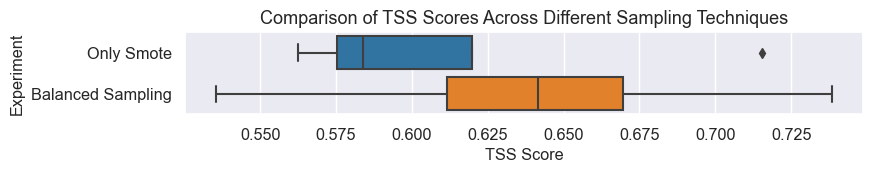

In [36]:
import pickle
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set seaborn style
sns.set_style("darkgrid")

# Define the data directory
data_dir = "/Users/samskanderi/MLP-ContrastiveLR-SWANSF/results/"

# Define the file names and corresponding experiment names
file_names = [
    "lstm_smote_normalized.pkl",
    "lstm_OUS_normalized.pkl"
]

experiment_names = [
    "Only Smote",
    "Balanced Sampling"
]

# Load the data
all_data = []

for file_name in file_names:
    with open(os.path.join(data_dir, file_name), 'rb') as file:
        data = pickle.load(file)
        all_data.append(data)

# Extract TSS scores
tss_scores = []

for data in all_data:
    tss_scores.append([data[i][6] for i in range(4)])  # Assuming TSS scores are at position 6

# Prepare DataFrame for seaborn
tss_df = pd.DataFrame(tss_scores).T
tss_df.columns = experiment_names
tss_df['Partition'] = ["Partition 1-2", "Partition 2-3", "Partition 3-4", "Partition 4-5"]

# Melt the DataFrame for seaborn
tss_melted = tss_df.melt(id_vars='Partition', var_name='Experiment', value_name='TSS Score')

# Set the font scale
font_scale = 1.3
sns.set_context("notebook", font_scale=font_scale)

# Plot TSS Scores Boxplot
plt.figure(figsize=(9, 2))
sns.boxplot(y='Experiment', x='TSS Score', data=tss_melted)
plt.title('Comparison of TSS Scores Across Different Sampling Techniques', fontsize=10 * font_scale)
plt.ylabel('Experiment', fontsize=9 * font_scale)
plt.xlabel('TSS Score', fontsize=9 * font_scale)
plt.xticks(fontsize=9 * font_scale)
plt.yticks(fontsize=9 * font_scale)

plt.tight_layout()
plt.savefig('sampling.pdf')   
plt.show()